In [1]:
from sys import path
path.append('../')
import LinearModels as lm
import NonLinearModels_post as nlm

In [2]:
import numpy as np
from numpy import linalg as la
from scipy.stats import norm
from scipy import optimize
from tabulate import tabulate
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

Corner Solution Models
======================

The purpose of this week's problem set is to estimate a censored
regression model known as the Tobit Model. Censored regression models
are relevant when the dependent variable has positive probability mass
at some point, but is continuous in other ranges. One example is
top-coded income data, where the only available information is whether a
particular individual has income at or above some threshold level. In
this case, the income data are right-censored and the censoring is
basically a "flaw" in the data. A variable can also be left-censored. In
this case, the observed variable equals the threshold value when the
original variables is less than or equal to the threshold level. Another
situation where censored regression models can be applied is the case of
corner solutions. These arise, e.g., in consumption problems, where a
corner solution exists when a consumer consumes nothing of a particular
commodity. In this case, the data is not " flawed" but censoring is due
to the behaviour of the economic agent.

A censored variable has positive probability mass at some point. The
case of a left-censored variable is illustrated in Figure 1 below.

![image](../img/figure1.jpg)



The Tobit Model
---------------

Consider the Tobit model for a randomly drawn observation

$$
\begin{align}
\,y_{i}^{\ast } &=\mathbf{x}_{i}\mathbf{\beta }+u_{i} \quad \text{ where } 
u_{i}|\mathbf{x}_{i}\sim \mathcal{N}\left( 0,\sigma ^{2}\right) \\
y_{i} &= \max \left( 0,y_{i}^{\ast }\right)
\end{align}
$$

$y_{i}^{\ast }$ is a latent variable that is incompletely observed: $y_{i}$ is observed only when $y_{i}^{\ast }>0$. $\mathbf{x}_{i}$ is an observed vector of covariates and $\mathbf{\beta }$ is a vector of parameters which we seek to estimate. With respect to the latter, the crucial assumption is that the random independent error term, $u_{i}$, is normal.

The conditional expectation $\mathrm{E}\left(y|\mathbf{x}\right)$ is

$$
\begin{align}
\mathrm{E}\left( y|\mathbf{x}\right) &=\Pr \left( y=0|\mathbf{x}\right) \cdot 0+\Pr \left(
y>0|\mathbf{x}\right) \cdot \mathrm{E}\left( y|\mathbf{x},y>0\right)  \notag \\
&= \Pr \left( y>0|\mathbf{x}\right) \cdot \mathrm{E}\left( y|\mathbf{x},y>0\right),  \tag{1} 
\end{align} 
$$

where $\Pr \left( y>0|\mathbf{x}\right)$ is given by 

$$
\begin{align}
\Pr \left( y>0|\mathbf{x}\right) &=\Pr \left( y^{\ast }>0\mathbf{|x}\right) 
\notag \\
&=\Pr \left( \mathbf{x}\mathbf{\beta}+u>0\right)  \notag \\
&=\Pr \left( u>-\mathbf{x}\mathbf{\beta}\right)  \notag \\
&=\Pr \left( \frac{u}{\sigma } > \frac{-\mathbf{x}\mathbf{\beta}}{\sigma }\right)  \notag \\
&=1-\Phi \left( \frac{-\mathbf{x}\mathbf{\beta}}{\sigma }\right) 
=\Phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right),  \tag{2} 
\end{align}
$$

where the second-last equality follows from the normality assumption,
and the last one from the symmetry of the normal distribution. To obtain an expression for $\mathrm{E}\left(y|\mathbf{x},y>0\right)$ write

$$
\begin{align}
\mathrm{E}\left( y|\mathbf{x},y>0\right) 
&= \mathrm{E}\left(y^\star \mathbf{|x},y^\star>0\right)   \notag \\
&= \mathrm{E}\left(\mathbf{x}\mathbf{\beta} + u \mathbf{|x}, \mathbf{x}\mathbf{\beta} + u >0\right)   \notag \\
&=\mathbf{x}\mathbf{\beta}+\mathrm{E}\left( u|\mathbf{x},u>-\mathbf{x}\mathbf{\beta}\right) \notag \\
&= \mathbf{x}\mathbf{\beta} + \mathrm{E}\left (   u \left  | \mathbf{x} , \frac{u}{\sigma} > \frac{-\mathbf{x}\mathbf{\beta}}{\sigma} \right. \right ). \tag{3}  
\end{align}
$$

The only difficult part here is
$E\left( u|\mathbf{x},u/\sigma>-\mathbf{%
x\beta /\sigma}\right)$. Rewrite this as 

$$
\begin{aligned}
\mathrm{E}\left (   u \left  | \mathbf{x} , \frac{u}{\sigma} > \frac{-\mathbf{x}\mathbf{\beta}}{\sigma} \right. \right ) 
&=\sigma \mathrm{E}\left( \left. 
\frac{u}{\sigma }\right\vert \frac{u}{\sigma }>\frac{-\mathbf{x}\mathbf{\beta}}{%
\sigma }\right) \\
&=\sigma \frac{\phi \left( -\mathbf{x}\mathbf{\beta}/\sigma \right) }{1-\Phi\left(-\mathbf{x}\mathbf{\beta}/\sigma \right) }\end{aligned}
$$

The nominator gives the density at $-\mathbf{x}\mathbf{\beta}/\sigma$ and
the denominator gives the probability that
$u/\sigma >-\mathbf{x}\mathbf{\beta}%
/\sigma$, i.e., it scales the density up by the probability to observe an individual with $y^{\ast }>0$. This is illustrated in figure 2, where the density function for a standard normal is shown together with the density of a standard normal that is truncated at zero. The truncation implies that the mean of the truncated distribution is positive, as indicated by the dotted line.

![image](../img/figure2.jpg)

Using the symmetry of the normal distribution, $1-\Phi \left( -%
\mathbf{x}\mathbf{\beta}/\sigma \right) =\Phi \left( \mathbf{x}\mathbf{\beta}/\sigma \right)$
and
$\phi \left( -\mathbf{x}\mathbf{\beta}/\sigma \right) =\phi \left( \mathbf{%
x\beta }/\sigma \right)$, we have that

$$
E\left( u|\mathbf{x},u>-\mathbf{x}\mathbf{\beta}\right) =\sigma \,\frac{\phi \left( 
\mathbf{x}\mathbf{\beta}/\sigma \right) }{\Phi \left( \mathbf{x}\mathbf{\beta}/\sigma
\right) } 
$$

The expression for $E\left( y|\mathbf{x},y>0\right)$ found in
(3) can then be written as:

$$
E\left( y|\mathbf{x},y>0\right) =\mathbf{x}\mathbf{\beta}+\sigma \lambda(\mathbf{x}\mathbf{\beta}/\sigma) \tag{4}
$$

where
$\lambda(\mathbf{x}\mathbf{\beta}/\sigma) \equiv \phi \left( \mathbf{x}\mathbf{\beta}/\sigma
\right) / \Phi \left( \mathbf{x}\mathbf{\beta}/\sigma \right)$ is called the
inverse Mills ratio, while the expression in
(1) becomes:

$$
\mathrm{E}\left( y|\mathbf{x}\right) =
  \mathbf{x}\mathbf{\beta}\cdot\Phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right) + \sigma\,\phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right). \tag{5}
$$

While $\lambda(z)$ does look weird, it also has sensible properties
which make sense for our model. In particular, $\lambda(z)>0$ for all
$z \in \mathbb{R}$ with $\lambda(z) \rightarrow 0$ for
$z \rightarrow \infty$ and $\lambda(z) \rightarrow \infty$ for
$z \rightarrow -\infty$.

Estimation
----------

The model has a distinct nonlinear component that depends on the
probability that $y_{i}^{\ast }>0$. The log-likelihood contribution for
observation $i$ therefore consists of two components:

$$
\begin{align}
\ell_{i} = \mathbf{1}\left\{ y_{i}=0\right\} \log \left[ 1-\Phi \left( \mathbf{x}_{i}\mathbf{\beta }/\sigma \right) \right] +\mathbf{1}\left\{ y_{i}>0\right\}
\left\{ -\frac{1}{2}\left[ \log \left( 2\pi \right) +\log \left( \sigma
^{2}\right) +\left( y_{i}-\mathbf{x}_{i}\mathbf{\beta }\right) ^{2}/\sigma
^{2}\right] \right\} \tag{6}
\end{align}
$$

For each observation, the likelihood contribution is determined either
by the first term which is the probability of $y_{i}=0$, or the second
term which is similar to the log-likelihood of the linear regression
model.

Marginal effects
----------------

If the interest lies in the marginal effect of a change in a continuous variable $x_{j}$ conditional on $y>0$ then we simply differentiate eq. (4) wrt. $x_j$. Note that since we will be looking at $\mathrm{E}(y|\mathbf{x},y>0)$ and $\mathrm{E}(y|\mathbf{x})$ where we condition on $\mathbf{x}$, this means that we will have to evaluate the expressions at the particular value of $\mathbf{x}$ (When you see these conditional expectations, recall that you should really be thinking $\mathrm{E}(y|\mathbf{x} = \mathbf{x}^0,y>0)$, which will be a function of $\mathbf{x}^ 0$. In other words, in these expressions, $\mathbf{x}$ will be $1 \times K$ and not $N \times K$.).

In the following, we will make use of the fact that
$\frac{\partial }{\partial z}\lambda(z) = -\lambda(z)[z + \lambda(z)]$.
Writing $\lambda = \lambda (\mathbf{x}\mathbf{\beta}/\sigma)$ in order to keep notation simple, the first derivative of the expression in eq. (4) provides:

$$
\begin{align}
\frac{\partial \mathrm{E}\left( y|\mathbf{x},y>0\right) }{\partial x_{j}} 
&=\beta_{j}+\sigma \frac{\partial\lambda}{\partial x_{j}}  \notag \\
&=\beta_{j}+\sigma \left[-\lambda \cdot \left(\mathbf{x}\mathbf{\beta}/\sigma +\lambda\right) \right]\left(\beta _{j}/\sigma \right)  \notag \\
&=\beta_{j}\left[ 1-\lambda \cdot \left( \mathbf{x}\mathbf{\beta}/\sigma +\lambda
\right) \right]. \tag{7} 
\end{align}
$$

In the exercise, you will be asked to compute
$\partial \mathrm{E}(y|\mathbf{x} = \bar{\mathbf{x}},y>0)/\partial x_j$.

If the interest centers on
$\partial \mathrm{E}\left( y|\mathbf{x}\right)
/\partial x_{j}$, then the marginal effect is obtained by
differentiating the expression in (5) with respect to $\mathbf{x}$:

$$
\begin{align}
\frac{\partial \mathrm{E}\left( y|\mathbf{x}\right) }{\partial x_{j}}
&= \beta_j\Phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right) +
\mathbf{x}\mathbf{\beta}\,\phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right)\frac{\beta_j}{\sigma} +  
\sigma\,\phi'\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma}\right)\frac{\beta_j}{\sigma} \tag{8} \\
&= \beta _{j}\Phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right), \tag{9}
\end{align}
$$

where $\phi'(z)=\partial\phi(z)/\partial z$ denotes the first derivative of the pdf of the standard normal distribution, and has the property that $\phi'(z)=-z\phi(z)$, (Try to prove it!) thus explaining why the last two terms of eq. (8) cancel out.

*Note:* Both functional forms for the marginal effect takes the form of a correction multiplied with the parameter for the variable in question. For eq. (9), the marginal effect must have the same sign as $\beta_j$ since $\Phi(z) > 0 \, \forall z$. The same is true for (7), because it turns out that the correction
factor there will be strictly between zero and one.

Empirical analysis
==================

The exercise asks you to estimate a censored regression model for the
number of working hours in the labour market, using the `mroz_hours.txt`
dataset (same as PS04, with working hours). Working hours is a
left-censored variable because the variable hours takes the value zero
when no hours are put in the labour market. The data set
`mroz_hours.txt` contains observations on 753 women for the following
variables:

|*Variable*  | *Definition*|
|------------| ---------------------------------|
|`Hours`     | Number of hours worked annually|
|`Nwifeinc`  | Non wife income|
|`Educ`      | Years of education|
|`Exper`     | Experience in labour market|
|`Expersq`   | Experience squared|
|`Age`       | Age|
|`Kidslt6`   | Number of kids aged 0--5|
|`Kidsge6`   | Number of kids aged 6--18|

In [3]:
# Load data
data =  np.loadtxt('mroz_hours.txt', delimiter=',')
n = data.shape[0]

# Declare variables
hours = data[:, 0].reshape(-1, 1)
nwifeinc = data[:, 2].reshape(-1, 1)
exper = data[:, 3].reshape(-1, 1)
expersq = data[:, 4].reshape(-1, 1)
age = data[:, 5].reshape(-1, 1)
kidslt6 = data[:, 6].reshape(-1, 1)
kidsge6 = data[:, 7].reshape(-1, 1)
educ = data[:, 11].reshape(-1, 1)

In [4]:
# Declare vector and matrix
y = hours
ones = np.ones((n, 1))
x = np.hstack((ones, nwifeinc, educ, exper, expersq, age, kidslt6, kidsge6))
k = x.shape[1]

In [5]:
# Declare labels
lbly = 'hours'
lblx = ['cnst', 'nwifeinc', 'educ', 'exper', 'expersq', 'age', 'kidslt6', 'kidsge6']

## Question 0:
As a preperatino, plot y in a histogram. Does the distribution of hours worked look probelmatic?

In [6]:
# The matbplotlib.pyplot module is already loaded for you as plt.
# A hint is to use more bins than default, try for example 50 bins.
# FILL IN: Plot a histogram of y.

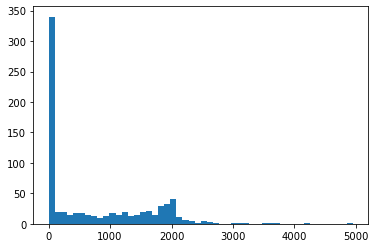

In [7]:
plt.hist(y, 50) ;

## Question 1:
Estimate by OLS a regression function of annual hours worked as a function of the variables (`nwifeinc, educ, exper, expersq, age, kidslt6, kidsge6`), using the LinearModels module. 

You then have to create a numpy array called `theta0` with dimensions $9 \times 1$. This need to be filled in the first eigth rows with the $\hat{\beta}$ coefficients from the ols estimation. The last row needs to filled with the $\hat{\sigma}$ from the ols estimation (note that we store $\hat{\sigma}$ and not $\hat{\sigma}^2$). This is because we need to estimate both $\hat{\beta}$ and $\hat{\sigma}$ in the log likelihood contribution function from eq. (6) in the next question.

In [8]:
# FILL IN: Estimate the model of y on x using OLS
# FILL IN: Print the results in a nice table
# FILL IN: Print the results in a nice table

# FILL IN: Create a theta0 array with (9, 1) dimensions
# FILL IN: Fill the first 8 rows with b_hat from the OLS regression
# FILL IN: Fill the last row with sigma2 from the OLS regression

In [9]:
ols_results = lm.estimate(y, x)
lm.print_table((lbly, lblx), ols_results)

theta0 = np.zeros((9, 1))
theta0[:-1] = ols_results.get('b_hat')
theta0[-1] = np.sqrt(ols_results.get('sigma2'))

Results
Dependent variable: hours

                 Beta          Se    t-values
--------  -----------  ----------  ----------
cnst      1330.48      273.413        4.86619
nwifeinc    -3.44664     2.22873     -1.54646
educ        28.7611     12.9696       2.21758
exper       65.6725     10.7367       6.11664
expersq     -0.700494    0.370031    -1.89307
age        -30.5116      4.22218     -7.22651
kidslt6   -442.09       57.1578      -7.73456
kidsge6    -32.7792     22.6809      -1.44523
R² = 0.266
σ² = 562767.944


## Question 2:
Finish writing the criterion function, in the `NonLinearModels_ante.py` based on eq. (6). Then, estimate the model.

*Note:* In the code, G is matrix from $\Phi \left( \mathbf{x}_{i}\mathbf{\beta }/\sigma \right)$, where $\Phi$ is the cummulative normal distribution.

You can check if you got the correct result below.

In [10]:
np.isclose(
    np.mean(nlm.tobit_criterion(theta0, y, x))
    , -5.257462977706353
)

True

In [11]:
result = nlm.estimate(
    nlm.tobit_criterion, theta0, y, x
)

Optimization terminated successfully.
         Current function value: 5.072163
         Iterations: 133
         Function evaluations: 1400
         Gradient evaluations: 140


## Question 2:
Estimate the corresponding Censored Regression Model by Maximum Likelihood. To do this, $\texttt{[FILL IN]}$ the blanks in the $\texttt{criterion}$ function in the $\texttt{tobit}$ class and supply it to the $\texttt{estimation\_m}$ function exactly as you did with the linear equation last week. Report also $\hat{\sigma}^{2}$ and $R_{\mathrm{Tobit}}^{2}$. 

\[*Hint:* $R_{\mathrm{Tobit}}^{2}$ is the squared correlation between $y_{i}$ and $\hat{y}_{i}$, where $\hat{y}_i = \Phi (\mathbf{x}_i \hat{\beta}/\hat{\sigma})\mathbf{x}_i \hat{\beta} + \hat{\sigma}\phi(\mathbf{x}_i \hat{\beta}/\hat{\sigma})$ is the estimate of $\mathrm{E}\left(y|\mathbf{x}=\mathbf{x}_{i}\right )$\]

## Question 3:
Calculate the $R_{\mathrm{Tobit}}^{2}$, this is the squared correlation between $y_{i}$ and $\hat{y}_{i}$, where $\hat{y}_i = \Phi (\mathbf{x}_i \hat{\beta}/\hat{\sigma})\mathbf{x}_i \hat{\beta} + \hat{\sigma}\phi(\mathbf{x}_i \hat{\beta}/\hat{\sigma})$, which is the estimate of $\mathrm{E}\left(y|\mathbf{x}=\mathbf{x}_{i}\right )$\] ($\Phi$ is the normal cdf, and $\phi$ is the normal pdf).

In [12]:
# FILL IN: A recomendation is to get the beta coefficient from the tobit regression and store it in a variable (remember that the last b_hat value from your results is the estimate for sigma, and should not be used to calculate R2)
# FILL IN: Another recommendation is to get the standard errors from the tobit regression (again, the final standard error belongs to the sigma estimation, and sohuld not be included).

# FILL IN: calculate yhat given the ecuation above.
# FILL IN: use np.corrcoef() to calculate the correlation between y and y_hat. You may need to flatten the input arrays.
# Square the correlation between y and y_hat, this is your R2 value. If you call this value R2_tob, it will work with the rest of the code.

# You should get something close to:
np.isclose(R2_tob, 0.52461293*0.52461293)

NameError: name 'R2_tob' is not defined

In [20]:
# Compute R2
sigma_tob = result.get('b_hat')[-1]
sig_tob = np.sqrt(result.get('b_hat')[-1])
b_tob = result.get('b_hat')[:-1].reshape(-1, 1)
b_se_tob = result.get('se')[:-1]

xb = x@b_tob
y_hat = xb*norm.cdf(xb/sigma_tob) + sigma_tob*norm.pdf(xb/sigma_tob)
rho = np.corrcoef(y.flatten(), y_hat.flatten())[0, 1]
R2_tob = rho*rho

In [21]:
# Add to dict and print
result['R2'] = R2_tob
result['sigma2'] = result.get('b_hat')[-1]
lm.print_table(
    (lbly, lblx), result, title='Tobit Results', floatfmt='.2f'
)

Tobit Results
Dependent variable: hours

             Beta      Se    t-values
--------  -------  ------  ----------
cnst      1276.99  449.66        2.84
nwifeinc    -8.50    4.41       -1.93
educ        71.65   21.68        3.30
exper      128.77   16.22        7.94
expersq     -1.76    0.50       -3.50
age        -58.41    7.84       -7.45
kidslt6   -918.07  112.29       -8.18
kidsge6    -28.49   38.82       -0.73
R² = 0.275
σ² = 1121.717


Your table should look something like this:

Tobit Results <br>
Dependent variable: hours <br>

|          |    Beta |     Se |   t-values |
|----------|---------|--------|------------|
| cnst     | 1276.99 | 449.66 |       2.84 |
| nwifeinc |   -8.50 |   4.41 |      -1.93 |
| educ     |   71.65 |  21.68 |       3.30 |
| exper    |  128.77 |  16.22 |       7.94 |
| expersq  |   -1.76 |   0.50 |      -3.50 |
| age      |  -58.41 |   7.84 |      -7.45 |
| kidslt6  | -918.07 | 112.29 |      -8.18 |
| kidsge6  |  -28.49 |  38.82 |      -0.73 |
R² = 0.275 <br>
σ² = 1121.717

## Question 3: 
Calculate the two types of marginal effects, cf. eqs. (7) and (9), of taking an additional year of education evaluated at the mean values of the $\mathbf{x}$'s. Remember that $\lambda(\mathbf{x}\mathbf{\beta}/\sigma) \equiv \phi \left( \mathbf{x}\mathbf{\beta}/\sigma
\right) / \Phi \left( \mathbf{x}\mathbf{\beta}/\sigma \right)$ is called the inverse Mills ratio.

I reiterate the functions:
$$
\begin{align}
\frac{\partial \mathrm{E}\left( y|\mathbf{x},y>0\right) }{\partial x} 
&=\beta\left[ 1-\lambda \cdot \left( \mathbf{x}\mathbf{\beta}/\sigma +\lambda
\right) \right]. \tag{7} 
\end{align}
$$

$$
\begin{align}
\frac{\partial \mathrm{E}\left( y|\mathbf{x}\right) }{\partial x}
&= \beta \Phi\left(\frac{\mathbf{x}\mathbf{\beta}}{\sigma }\right), \tag{9}
\end{align}
$$


In [27]:
result.get('b_hat')

array([1276.99473856,   -8.49537527,   71.65409462,  128.76721706,
         -1.76410405,  -58.40529759, -918.07424349,  -28.48945359,
       1121.71738516])

In [22]:
x0 = np.mean(x, axis=0)
x0[4] = x0[3]*x0[3]  # Square of mean, and not mean of square.

In [ ]:
# I recommend that you make a function out of this, which takes x an b as an input, which are the representative observation and the b_hat coefficients (from the tobit estimatino) respectively. I have already created the bones of a function for you.

def marg_effect(x, b):  
    # FILL IN: Calculate first the inverse Mills ratio.
    # Write up the marginal effect using eq. (7). Note that the square bracket gives you a single value, which you multiply on the beta vector. Call this margeff_1

    # Write up the marginal effect using eq. (9). Again, you multiply the beta vector on a single value. Call this margeff_2

    return margeff_1, margeff_2

In [28]:
sigma_tob = np.sqrt(sigma_tob)

In [29]:
def marg_effect(x, b):
    xb = x@b

    # dE(y|x,y>0)/dx, see eq.(7)
    phi = norm.cdf(xb/sigma_tob)
    _lambda = norm.pdf(xb/sigma_tob)/phi  # Inverse Mills ratio
    correction = 1 - _lambda*(xb/sigma_tob + _lambda)  # Square bracket
    correction = correction.reshape(1, -1)
    margeff_1 = b_tob@correction  # eq. (y)

    # dE(y|x)/dx, see eq.(9)
    margeff_2 = b_tob@phi.T

    return margeff_1, margeff_2

In [30]:
# Calculate the marginal effect and print out the effect of education.
margeff_1, margeff_2 = marg_effect(x0, result.get('b_hat')[:-1].reshape(-1, 1))
table = [
    ['dE(y|x,y>0)/dx', margeff_1[2]], 
    ['dE(y|x)/dx', margeff_2[2]]
]
print('Marginal effect of an additional year of education from tobit model')
print(tabulate(table))

Marginal effect of an additional year of education from tobit model
--------------  -------
dE(y|x,y>0)/dx  71.6541
dE(y|x)/dx      71.6541
--------------  -------


## Question 5:
Calculate for all individuals the two types of marginal effects of taking an additional year of education. i) Draw a histogram of the marginal effect of education across individuals. ii) Make a scatter plot with educ along the x-axis and the marginal effect along the y-axis. Give an interpretation of your findings.

In [25]:
# If you have written the function correctly, we should be able to pass the whole x matrix thorugh the function.
margeff_all_1, margeff_all_2 = marg_effect(x, result.get('b_hat')[:-1].reshape(-1, 1))

In [ ]:
# FILL IN: Plot a histogram of the marginal effect from one additional year of aducation from margeff_all_1
# FILL IN: Plot a histogram of the marginal effect from one additional year of aducation from margeff_all_2

# FILL IN: Plot a scatterplot of the marginal effect from one additional year of aducation from margeff_all_1
# FILL IN: Plot a scatterplot of the marginal effect from one additional year of aducation from margeff_all_2

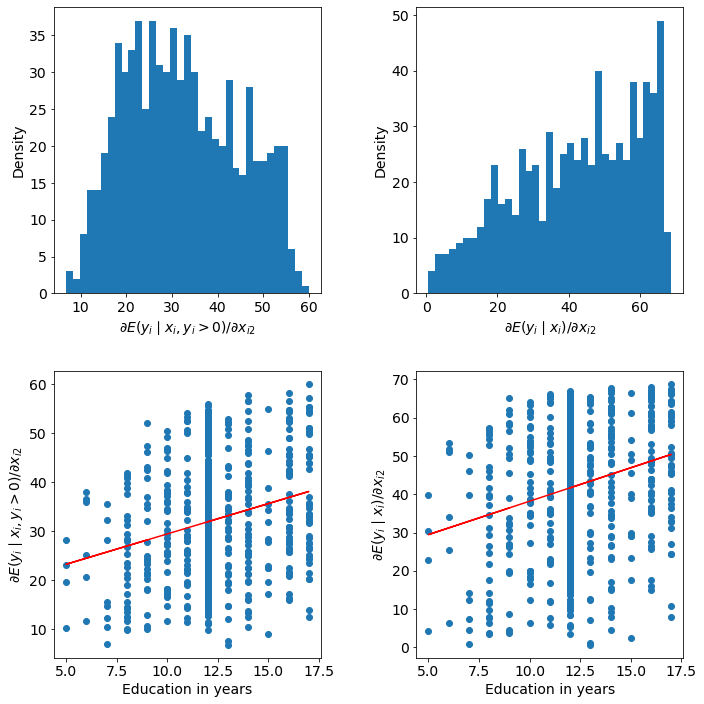

In [141]:
fig = plt.figure(figsize=(10, 10))
# Set global font size parameter.
plt.rcParams['font.size'] = '14'

# Histogram 1
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(
    margeff_all_1[2], 
    bins=35)
ax1.set_ylabel('Density')
ax1.set_xlabel(
    r"$\partial E\left(y_{i}\mid x_{i},y_{i}>0\right)/\partial x_{i2}$"
)

# Histogram 2
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(
    margeff_all_2[2], 
    bins=35)
ax2.set_ylabel('Density')
ax2.set_xlabel(
    r"$\partial E\left(y_{i}\mid x_{i}\right)/\partial x_{i2}$"
)

# Scatter 1
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(x[:, 2], margeff_all_1[2])
# Plot line of best fit:
b, a = np.polyfit(x[:, 2], margeff_all_1[2], 1)
ax3.plot(x[:, 2], a + b*x[:, 2], color='red')
ax3.set_ylabel(
    r"$\partial E\left(y_{i}\mid x_{i},y_{i}>0\right)/\partial x_{i2}$"
)
ax3.set_xlabel('Education in years')

# Scatter 2
ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(x[:, 2], margeff_all_2[2])
# Plot line of best fit:
b, a = np.polyfit(x[:, 2], margeff_all_2[2], 1)
ax4.plot(x[:, 2], a + b*x[:, 2], color='red')
ax4.set_ylabel(
    r"$\partial E\left(y_{i}\mid x_{i}\right)/\partial x_{i2}$"
)
ax4.set_xlabel('Education in years')

# Make some space between subplots and make it nice.
fig.tight_layout(h_pad=2.5, w_pad=2.5)
plt.show()